In [1]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import csv
#from scipy.optimize import minimize
#import tensorflow as tf

PointConfiguration.set_engine('internal')
#PointConfiguration.set_engine('topcom')
print 'Done.'

Done.


In [2]:
#Helper functions to initialize input data

def reflex_poly(n):
    
    polytopes_list = [1, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 82, 83, 84, 85, 219, 220]
    
    P = list(ReflexivePolytope(3, polytopes_list[n-1]-1).vertices())
    pts = []
    
    for j in range(len(P)):
        pts.append(list(P[j]))
    
    return pts

def reflex_poly_list(num_poly):
    
    if num_poly > 18:
        print 'Please input integers <= 18'
        return -1
    
    polytopes_list = [1, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 82, 83, 84, 85, 219, 220]

    pts = []
    
    for i in range(num_poly):
        pts.append(reflex_poly(i))

    print 'Initialize reflexive polytope done.'
    
    return pts

def input_data(input_path):
    
    #Code to load 'poly_out.txt'
    with open(input_path) as f:
        pts = []
        pts_tmp = []
        
        for line in f:
            #print line
            pts_tmp = eval(line)
            pts.append(pts_tmp)
        
        '''
        #Code to load 'result.txt'
        for line in f:
            pt = line.split(' ')
            print line
            if line == '\n' or pt == '\n':
                pts.append(pts_tmp)
                pts_tmp = []
                continue
            for i in range(len(pt)):
                print pt[i]
                pt[i] = float(pt[i].strip(','))
            pts_tmp.append(pt)
        if line != '\n':
            pts.append(pts_tmp)
        '''
    
    return pts

print 'Done.'

Done.


In [11]:
#Helper functions to find the Hilbert Series

def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

#Compute cross product of three 4-vectors
def four_cross(v1, v2, v3, v4):
    #print "input vectors: ", v1, v2, v3, v4
    v = np.zeros((4,))
    '''
    v1 = list(map(int, v1))
    v2 = list(map(int, v2))
    v3 = list(map(int, v3))
    '''
    counter = 0
    
    for i in range(4):
        mat = [v1[np.arange(len(v1))!=i].tolist(), v2[np.arange(len(v2))!=i].tolist(), v3[np.arange(len(v3))!=i].tolist()]
        mat = matrix(ZZ, mat)
        #print 'matrix: '
        #print mat
        if counter == 1:
            v[i] = -1*mat.det()
            counter = 0
            #print 'neg: ', v[i]
            continue
        elif counter == 0:
            v[i] = mat.det()
            counter = 1
            #print 'pos: ', v[i]
    #print v
    mat = matrix(RR, [v1.tolist(), v2.tolist(), v3.tolist(), v4.tolist()])
    
    if mat.det() < 0:
        #print 'original: ', v
        v = -1*v
        #print 'changed: ', v
    #print 'vector: ', v
    return v

'''
def Hilb(tri, p, output):
    num_tri = len(tri)
    len_tri = len(tri[0])
    triang_list = np.zeros((num_tri, len_tri, 4))
    
    #Convert each element of p into a 4-vector
    #whose last entry equals to 1
    for i in range(num_tri):
        for j in range(len_tri):
            triang_list[i][j] = np.append(np.array(p[tri[i][j]]) , 1)
            
    #print 'triang_list: '
    #print triang_list   '''
def Hilb(triang_list, output):
    triang = np.array(triang_list)
    power = np.zeros(shape = triang.shape)
    Hilb = 0
    t = var('t')
    t1 = var('t1')
    t2 = var('t2')
    t3 = var('t3')
    t4 = var('t4')
    for tri in range(triang.shape[0]):
        hilb = 1
        t_prod = 1
        for i in range(4):
            #Multiplying by -1 is optional
            power[tri][i] = -1*four_cross(triang[tri][i], triang[tri][np.remainder(i+1, 4)], triang[tri][np.remainder(i+2, 4)], triang[tri][np.remainder(i+3, 4)])
            t_prod = t1^(int(power[tri][i][0]))*t2^(int(power[tri][i][1]))*t3^(int(power[tri][i][2]))*t4^int((power[tri][i][3]))
            hilb *= (1-t_prod)^(-1)
        #print 'Hilbert: ', hilb
        Hilb += hilb
    #print 'Hilb: ', Hilb()
    #print Hilb(t1=t, t2=t, t3=t).series(t4, 3)
    #print "p-q web: ", power 
    print Hilb
    
    
    m = var('m')
    b1 = var('b1')
    b2 = var('b2')
    b3 = var('b3')
    b4 = var('b4')
    Hilb *= m^4
    
    #print 'Hilb: ', str(Hilb(t1 = (m*b1).exp(), t2 = (m*b2).exp(), t3 = (m*b3).exp(), t4 = (m*4).exp())).replace('e', 'E')
    
    
    Series = Hilb(t1 = (m*b1).exp(), t2 = (m*b2).exp(), t3 = (m*b3).exp(), t4 = (m*4).exp()).series(m==0, 1)
    Series = Series.truncate()
    #Series = limit(Hilb(t1 = (m*b1).exp(), t2 = (m*b2).exp(), t3 = (m*b3).exp(), t4 = (m*4).exp()), m=0)
    #print 'Series: ', Series
    
    if output != 0:
        output.write("%s\n" % Series)

    return Series

def Triang(p, output):
    #Input output = 0 if do not want output
    pts = np.array(p)
    poly = Polyhedron(p)
    pts_max = int(max(np.amax(np.absolute(pts), axis=0)))+1
    pts_new = pts
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if exist(pts, latt)==1:
                    continue
                if poly.contains(latt) == 1:
                    pts_new = np.append(pts_new, np.array(latt).reshape((1,3)), axis = 0)  
    #print 'pts_new: ', pts_new
    pts_new = pts_new.tolist()
    print 'number of points with lattice: ', len(pts_new)
    points = PointConfiguration(pts_new)
    try:
        triang = points.triangulate()
    except:
        raise ValueError('Cannot Triangulate.')
    triang = [list(triang[i]) for i in range(len(triang))]
    triang_new = []
    check_triang(triang, pts_new, triang_new)
    print 'triangulate: ', triang_new
    
    #Calculate the Hilbert series
    #Series = Hilb(triang, pts_new, output)
    Series = Hilb(triang_new, output)
    
    return Series
'''
def check_triang(triang, pts):
    triang_new = triang
    for i in range(len(triang)):
        #triang_new.append(list(triang[i]))
        poly_tmp = Polyhedron(list(triang[i]))
        for j in range(len(pts)):
            if poly_tmp.contains(pts[j]):
                triang_tmp = PointConfiguration(list(triang[i])).triangulate()
                triang_new.remove(triang[i])
                triang_new.append(triang_tmp)
    return triang_new

'''
def check_one_triang(triang, pts):
    triang_list = triang
    #print 'pts: ', pts
    #print 'triang: ', triang
    vert = [pts[k] for k in triang]
    poly = Polyhedron(vert)
    
    for h in range(len(pts)):
        if h in triang:
            continue
        elif poly.contains(pts[h]):
            triang_list.append(h)
    
    return triang_list

def check_triang(triang, pts, triang_new):
    #triang_new = []
    for i in range(len(triang)):
        check = check_one_triang(triang[i], pts)
        #print "check ", i, ": ", check
        len_check = len(check)
        
        if len_check <= 4:
            triang_save = [np.append(np.array(pts[k]),1).tolist() for k in check]
            #print 'add: ', triang_save
            triang_new.append(triang_save)
            
        else:
            pts_tmp = [pts[j] for j in check]
            #print "vertices: ", pts_tmp
            triang_tmp = PointConfiguration(pts_tmp).triangulate()
            triang_tmp = [list(triang_tmp[i]) for i in range(len(triang_tmp))]
            #print "further triang: ", triang_tmp
            check_triang(triang_tmp, pts_tmp, triang_new)
    #print triang_new


print 'Done.'

Done.


In [7]:
#Helper functions to find the minimum of the volume function
#(None of these work as well as Mathematica yet.)

from scipy.optimize import fsolve
from sympy import nsolve

def min_function(Series, p):
    try:
        return (Series(b1=p[0], b2=p[1], b3=p[2]))^2
    except:
        return -1

def min_constraint(Series, a, b, c):
    if min_function(Series, [a,b,c])== -1:
        print 'bad try: ', a,' ', b , ' ', c 
        return -100
    try:
        print 'val: ', Series(b1=a, b2=b, b3=c)
        return 1-Series(b1=a, b2=b, b3=c)
    except:
        return -100

def Find_Minimum(Series):
    function = lambda p: min_function(Series, p)
    
    constraint = ({'type': 'ineq', 'fun': lambda p:  min_constraint(Series, p[0], p[1], p[2])})
    #constraint = ({'type': 'ineq', 'fun': lambda p:  1-Series(b1=p[0], b2=p[1], b3=p[2])})
    
    solution = scipy.optimize.minimize(function, (0.7,0.2,0.3), constraints=constraint)
    
    return solution

def eval_sol(Series, sol):
    try:
        return Series(b1 = sol[0].rhs(), b2 = sol[1].rhs(), b3 = sol[2].rhs())
    except:
        print 'no sol'
        return CDF(I)

def D_Minimum(Series):
    d1 = diff(Series, b1)
    d2 = diff(Series, b2)
    d3 = diff(Series, b3)
    
    solution = solve([d1 == 0, d2 == 0, d3 == 0], b1, b2, b3)
    #print 'solution: ', solution
    
    sol_len = len(solution)
    
    new_sol = []
    
    for j in range(sol_len):
        if solution[j][0].rhs() in RR and solution[j][1].rhs() in RR and solution[j][2].rhs() in RR:
            vol = eval_sol(Series, solution[j])
            print vol
            if vol not in RR:
                continue
            new_sol.append(vol)
            #new_sol.append(solution[j])
    #solution = new_sol
    
    print 'new_sol: ', new_sol
    
    vol_min_abs = min(new_sol)
    
    return vol_min_abs

def func(p, *d):
    f1, f2, f3 = d
    return (f1(b1 = p[0], b2 = p[1], b3 = p[2]), f2(b1 = p[0], b2 = p[1], b3 = p[2]), f3(b1 = p[0], b2 = p[1], b3 = p[2]))

def constraint(Series, sol):
    vol = Series(b1 = sol[0], b2 = sol[1], b3 = sol[2])
    if vol <= 1 and vol >= 0:
        return 1, vol
    
    return 0, -1

def NSolve(Series):
    d1 = diff(Series, b1)
    d2 = diff(Series, b2)
    d3 = diff(Series, b3)
    d = (d1, d2, d3)
    const = 0
    count = 0
    
    while const == 0:
        d1_0 = np.random.uniform(low=-1, high=1)
        d2_0 = np.random.uniform(low=-1, high=1)
        d3_0 = np.random.uniform(low=-1, high=1)
        print 'reset starting point: ', d1_0, d2_0, d3_0
        try:
            sol = fsolve(func, x0 = np.array([d1_0, d2_0, d3_0]), args = d)
            print 'solution: ', sol
        except:
            continue
        if abs(sol[0]) > 10 or abs(sol[1]) > 10 or abs(sol[2]) > 10:
            continue
        const, vol = constraint(Series, sol)
        
        count += 1
        if count > 1000:
            print 'Infinite loop. Force stop.'
            return -1
    
    print 'Done.'
    
    return vol

print 'Done.'

Done.


In [ ]:
#Generate hilbert series and volume

def generate_hilbert_vol(output_hilb, output_vol):
    input_path = 'output/polygon/poly_out_2.txt'
    pts = input_data(input_path)
    for i in range(len(pts)):
        pts_new = pts[i]
        points = PointConfiguration(pts_new)
        
        #Triangulate
        triang = points.triangulate()
        triang = [list(triang[i]) for i in range(len(triang))]
        triang_new = []
        check_triang(triang, pts_new, triang_new)
        
        #Calculate Hilbert Series (write to output)
        Series = Hilb(triang_new, output_hilb)
        
        #Calculate Volume (write to output)
        vol = NSolve(Series)
        print i,'-th volume: ', vol
        output_vol.write("%s\n" % vol)

output_hilb_path = 'output/series/output_2.txt'
output_vol_path = 'output/vol/output_cube_30.txt'
output_hilb = open(output_hilb_path, 'w')
output_vol = open(output_vol_path, 'w')
generate_hilbert_vol(output_hilb, output_vol)
output_hilb.close()
output_vol.close()
print 'Done.'

1/((t1^16*t2^16 - 1)*(t4^32/t2^16 - 1)*(t3^16*t4^32/(t1^16*t2^16) - 1)*(t2^16/t3^16 - 1)) + 1/((t1^16*t3^16 - 1)*(t2^16*t4^32/(t1^16*t3^16) - 1)*(t4^32/t3^16 - 1)*(t3^16/t2^16 - 1)) + 1/((t3^16*t4^32 - 1)*(t4^32/t1^16 - 1)*(t4^32/t2^16 - 1)*(t1^16*t2^16/(t3^16*t4^32) - 1)) + 1/((t2^16*t4^32 - 1)*(t4^32/t1^16 - 1)*(t4^32/t3^16 - 1)*(t1^16*t3^16/(t2^16*t4^32) - 1)) + 1/((t2^3*t4^6 - 1)*(t3^3*t4^6 - 1)*(t1*t2*t3*t4^5 - 1)*(1/(t1*t2^4*t3^4*t4^14) - 1)) + 1/((t1^16*t2^16*t3^16*t4^32 - 1)*(t1^16*t4^32 - 1)*(1/(t1^16*t2^16) - 1)*(1/(t1^16*t3^16) - 1)) + 1/((t3^12*t4^24 - 1)*(t1*t2^4*t3^4*t4^14 - 1)*(t1^3*t4^6 - 1)*(1/(t1^4*t2^4*t3^16*t4^32) - 1)) + 1/((t1^4*t2^4*t3^16*t4^32 - 1)*(t1^12*t4^24 - 1)*(t2^12*t4^24 - 1)*(1/(t1^16*t2^16*t3^16*t4^32) - 1))
reset starting point:  0.244234812804 -0.176015907163 -0.61536228104
solution:  [ 3.02054805  4.98177542  5.01063288]
reset starting point:  -0.99958336129 0.0558356559481 -0.0601723184288
solution:  [ 2.9482615   4.9751638   5.02185859]
reset star

/home/carnd/Downloads/SageMath/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/carnd/Downloads/SageMath/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


 [ 2.98757076  4.87255489  5.07785552]
reset starting point:  0.616901853694 0.539194079372 0.639066953784
solution:  [  3.19419479e+37  -2.54821179e+36  -2.54083889e+36]
reset starting point:  -0.385646314323 -0.241245453768 -0.791305757876
solution:  [ 3.01787714  5.00726524  4.94442045]

/home/carnd/Downloads/SageMath/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 800.
  warnings.warn(msg, RuntimeWarning)



reset starting point:  0.119601388888 -0.11976013721 0.458249568904
solution:  [  6.12466612e-01   6.12499185e-01   3.44241824e+08]
reset starting point:  -0.231492020212 0.716392175155 0.987412044151
solution:  [ 2.94275491  4.95643114  5.03287341]
reset starting point:  -0.848445138174 0.941417960537 -0.620448409385
solution:  [ 2.95499733  4.98165249  5.01257654]
reset starting point:  -0.451933277589 -0.47004268286 -0.793974770468
solution:  [ 2.97856602  5.02798399  4.94827643]
reset starting point:  0.500292633175 0.441463007272 0.506149958867
solution:  [ 3.08608131  4.97703341  4.98029481]
reset starting point:  0.740049016841 -0.782485415912 0.921858098294
solution:  [ 2.93390766  4.99436505  5.00413257]
reset starting point:  -0.697621237093 -0.83129216773 0.781958553677
solution:  [ 3.0107221   4.90555766  5.05272199]
reset starting point:  0.888298348431 0.605508202809 0.668955439812
solution:  [ 2.90407391  4.96349583  5.05835152]
reset starting point:  -0.356356716345 -0

In [45]:
#Below are all test scripts (optional)

p1 = [[4,0,0],[0,0,0],[0,1,0],[0,0,1]]
#p1 = [[3,0,0],[1,0,0],[0,1,0],[0,0,1]]
#p1 = [[2,0,0],[0,2,0],[0,0,2], [0,0,0]]
#series = Triang(p1, 0)
#print series

pts = [[4, 0, 0],
 [0, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [2, 0, 0],
 [3, 0, 0]]

points = PointConfiguration(pts)
triang = points.triangulate()
triang = list(triang)
#triang_new = [list(triang[i]) for i in range(len(triang))]
for i in range(len(triang)):
    triang_new.append(list(triang[i]))
triang = triang_new
print triang


[[0, 2, 3, 6], [1, 2, 3, 4], [2, 3, 4, 6]]


In [72]:
triang_new = []
check_triang(triang, pts, triang_new)

print 'result: ', triang_new


check  0 :  [0, 2, 3, 6]
add:  [[4, 0, 0], [0, 1, 0], [0, 0, 1], [3, 0, 0]]
check  1 :  [1, 2, 3, 4]
add:  [[0, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]
check  2 :  [2, 3, 4, 6, 5]
vertices:  [[0, 1, 0], [0, 0, 1], [1, 0, 0], [3, 0, 0], [2, 0, 0]]
further triang:  [[0, 1, 2, 4], [0, 1, 3, 4]]
check  0 :  [0, 1, 2, 4]
add:  [[0, 1, 0], [0, 0, 1], [1, 0, 0], [2, 0, 0]]
check  1 :  [0, 1, 3, 4]
add:  [[0, 1, 0], [0, 0, 1], [3, 0, 0], [2, 0, 0]]
result:  [[[4, 0, 0], [0, 1, 0], [0, 0, 1], [3, 0, 0]], [[0, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]], [[0, 1, 0], [0, 0, 1], [1, 0, 0], [2, 0, 0]], [[0, 1, 0], [0, 0, 1], [3, 0, 0], [2, 0, 0]]]


In [8]:
#p1 = [[4,0,0],[0,0,0],[0,1,0],[0,0,1]]
#p1 = [[3,0,0],[0,0,0],[0,1,0],[0,0,1],[1,1,0]]
#p2 = [[2,0,0],[0,0,0],[0,1,0],[0,0,1],[1,1,0],[1,0,1]]

p = [p1, p2]

for i in range(len(p)):
    series = Triang(p[i], 0)

    print series

    vol = NSolve(series)
    vol = round(vol, 5)
    print vol

NameError: name 'p1' is not defined

In [2]:
p = [[0.0, 0.0, 3.0], [0.0, 3.0, 0.0], [0.0, 3.0, 3.0], [3.0, 0.0, 0.0], [3.0, 3.0, 0.0], [3.0, 3.0, 3.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [2.0, 0.0, 3.0], [3.0, 0.0, 2.0], [3.0, 1.0, 3.0]]
poly = Polyhedron(p)
poly.plot()
'''
series = Triang(p, 0)

print series
vol = NSolve(series)

print vol'''

'\nseries = Triang(p, 0)\n\nprint series\nvol = NSolve(series)\n\nprint vol'

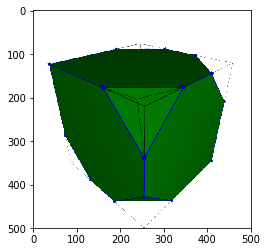

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("img/failed/triang/plot_2_2.png")
plt.imshow(img)
plt.show()

In [14]:
def facets_of_simplex(simplex):
            """
            Return the facets of the simplex and store the normals in facet_normals
            """
            print("facets_of_sim function")
            simplex = list(simplex)
            #print("simplex: ", simplex)
            origin = simplex[0]
            rest = simplex[1:]
            print("origin.reduced_affine_vector(): ", origin.reduced_affine_vector())
            span = matrix([ origin.reduced_affine_vector()-p.reduced_affine_vector()
                            for p in rest ])
            print('span: ', span)
            # span.inverse() linearly transforms the simplex into the unit simplex
            normals = span.inverse().columns()
            print('span.inverse(): ', span.inverse())
            print('normals: ', normals)
            facets = []
            # The facets incident to the chosen vertex "origin"
            for opposing_vertex, normal in zip(rest, normals):
                facet = frozenset([origin] + [ p for p in rest if p is not opposing_vertex ])
                facets.append(facet)
                normal.set_immutable()
                facet_normals[facet] = normal
            # The remaining facet that is not incident to "origin"
            facet = frozenset(rest)
            normal = -sum(normals)
            normal.set_immutable()
            facet_normals[facet] = normal
            facets.append(facet)
            return set(facets)

p = [[0.0, 0.0, 3.0], [0.0, 3.0, 0.0], [0.0, 3.0, 3.0], [3.0, 0.0, 0.0], [3.0, 3.0, 0.0], [3.0, 3.0, 3.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [2.0, 0.0, 3.0], [3.0, 0.0, 2.0], [3.0, 1.0, 3.0]]
self = PointConfiguration(p)
facet_normals = dict()
self._assert_is_affine()
point_order = list(self.points())
simplices = [ frozenset(self.contained_simplex()) ]
print simplices
facets = facets_of_simplex(simplices[0])
print 'facets: ', facets

# successively place the remaining points
for point in point_order:
    # identify visible facets
    visible_facets = []
    for facet in facets:
        origin = next(iter(facet))
        normal = facet_normals[facet]
        v = point.reduced_affine_vector() - origin.reduced_affine_vector()
        if v*normal>0:
            visible_facets.append(facet)
    print 'visible facets: ', visible_facets
    # construct simplices over each visible facet
    new_facets = set()
    for facet in visible_facets:
        simplex = frozenset(list(facet) + [point])
        print 'point: ', point
        print 'simplex: ', simplex
        simplices.append(simplex)

        for facet in facets_of_simplex(simplex):
            if facet in visible_facets: continue
            if facet in new_facets:
                new_facets.remove(facet)
                continue
            new_facets.add(facet)
    facets.difference_update(visible_facets)
    facets.update(new_facets)

# construct the triangulation
triangulation = [ [p.index() for p in simplex] for simplex in simplices ]

[frozenset([P(3.00000000000000, 1.00000000000000, 3.00000000000000), P(0.000000000000000, 3.00000000000000, 3.00000000000000), P(1.00000000000000, 0.000000000000000, 0.000000000000000), P(3.00000000000000, 3.00000000000000, 0.000000000000000)])]
facets_of_sim function
('origin.reduced_affine_vector(): ', (3.00000000000000, 1.00000000000000, 0.000000000000000))
('span: ', [ 3.00000000000000 -2.00000000000000 0.000000000000000]
[ 2.00000000000000  1.00000000000000  3.00000000000000]
[0.000000000000000 -2.00000000000000  3.00000000000000])
('span.inverse(): ', [ 0.230769230769231  0.153846153846154 -0.153846153846154]
[-0.153846153846154  0.230769230769231 -0.230769230769231]
[-0.102564102564103  0.153846153846154  0.179487179487179])
('normals: ', [(0.230769230769231, -0.153846153846154, -0.102564102564103), (0.153846153846154, 0.230769230769231, 0.153846153846154), (-0.153846153846154, -0.230769230769231, 0.179487179487179)])
facets:  set([frozenset([P(0.000000000000000, 3.0000000000000

ArithmeticError: self must be a square matrix

In [9]:
b1 = var('b1')
b2 = var('b2')
b3 = var('b3')
series = -1/((b1 + 4*b2 + 4*b3 - 16)*(b1 + 3*b2 + 3*b3 - 12)*b2*b3) - 1/((b1 + 3*b2 + 3*b3 - 12)*(b1 + 2*b2 + 2*b3 - 8)*b2*b3) - 1/((b1 + 2*b2 + 2*b3 - 8)*(b1 + b2 + b3 - 4)*b2*b3) - 1/((b1 + b2 + b3 - 4)*b1*b2*b3)

vol = NSolve(series)
vol = round(vol, 5)
print vol

reset starting point:  -0.945155396429 0.0289554292775 0.868486906506
solution:  [ -7.92395209e+37   1.50674164e+36   8.29731517e+37]
reset starting point:  -0.24412925128 0.544078319647 0.905419694929
solution:  [ -3.79295174e+39   3.12744189e+38   3.13947208e+38]
reset starting point:  0.719115524516 0.623074859994 0.178613812636
solution:  [ 3.99992642  1.00000341  1.00000136]
Done.
0.25


In [28]:
b1 = var('b1')
b2 = var('b2')
b3 = var('b3')

Series = -1/((b1 + 4*b2 + 4*b3 - 16)*(b1 + 3*b2 + 3*b3 - 12)*b2*b3) - 1/((b1 + 3*b2 + 3*b3 - 12)*(b1 + 2*b2 + 2*b3 - 8)*b2*b3) - 1/((b1 + 2*b2 + 2*b3 - 8)*(b1 + b2 + b3 - 4)*b2*b3) - 1/((b1 + b2 + b3 - 4)*b1*b2*b3)

d1 = diff(Series, b1)
d2 = diff(Series, b2)
d3 = diff(Series, b3)
d = (d1, d2, d3)

#vol = fsolve(func, d, (0.1, 0.1, 0.1))
vol = fsolve(func, x0 = np.array([0.1, 0.1, 0.1]), args = d)

print vol
print Series(b1 = vol[0], b2 = vol[1], b3 = vol[2])


vol = solve([d1 == 0, d2 == 0, d3 == 0], b1, b2, b3)
vol = [vol[0][0].rhs(), vol[0][1].rhs(), vol[0][2].rhs()]

print vol
print Series(b1 = 4.0, b2 = 1.0, b3 = 1.0)
#print Series(b1 = vol[0][0].rhs(), b2 = vol[0][1].rhs(), b3 = vol[0][2].rhs())

[ 4.00006586  0.99999455  0.99999452]
0.2500000000509317
[4, 1, 1]


ValueError: power::eval(): division by zero

In [36]:
from sage.plot.point import Point
triangle = Polyhedron(vertices=[[2,0,0],[0,2,0],[0,0,2]])
ineqs = triangle.inequality_generator()
hrep = triangle.Hrepresentation()
#print hrep

test = vector(ZZ,[1,1,1])
#test = [0,0,0]

for ineq in hrep:
    print ineq
    print ineq.eval(test)

An equation (1, 1, 1) x - 2 == 0
1
An inequality (0, -1, -1) x + 2 >= 0
0
An inequality (0, 1, 0) x + 0 >= 0
1
An inequality (0, 0, 1) x + 0 >= 0
1


In [16]:
import numpy as np
np.random.uniform(low=-1, high=1)

-0.7208901274128736